In [1]:
import sys
import os

root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root)
print(os.getcwd())

/Users/kashyap/Library/CloudStorage/ProtonDrive-kashyap.suthar07@pm.me-folder/Capstone_Project/models


In [2]:
# Import preprocessing
from utils.preprocessing import load_and_trasnform, preprocessing_data
from utils.save_metrics import save_metrics

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

print("All imports successful!")

All imports successful!


In [3]:
X, y = load_and_trasnform("../data/train.csv")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)


X_train shape: (1119, 80)
X_val shape: (280, 80)


In [4]:
preprocess = preprocessing_data(X_train)

In [5]:
poly = PolynomialFeatures(degree=3, include_bias=False)
linear = LinearRegression()

In [6]:
poly_pipe = Pipeline([("preprocessing", preprocess),("poly", poly), ("linear", linear)])

In [7]:
poly_pipe.fit(X_train, y_train)
y_val_pred = poly_pipe.predict(X_val)

In [8]:
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Polynomial Regression:")
print(" MSE:", mse)
print(" RMSE:", rmse)
print(" MAE:", mae)
print(" R2:", r2)

Polynomial Regression:
 MSE: 477486045.1705183
 RMSE: 21851.454074512258
 MAE: 13558.804006349808
 R2: 0.8498857414637943


In [9]:
save_metrics("Polynomial Regression", mse, rmse, mae, r2)

Saved metrics to /Users/kashyap/Library/CloudStorage/ProtonDrive-kashyap.suthar07@pm.me-folder/Capstone_Project/utils/../metrics/polynomial_regression.json


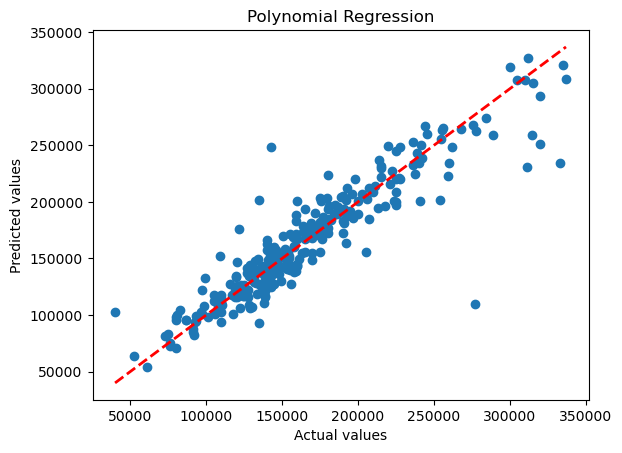

In [10]:
plt.figure()
plt.scatter(y_val, y_val_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Polynomial Regression")
plt.show()